In [37]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

Now we create a function to create the dataset required for the neural network

In [38]:
def create_data(points, classes):
    #initializing X and y datasets
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    
    return X, y    

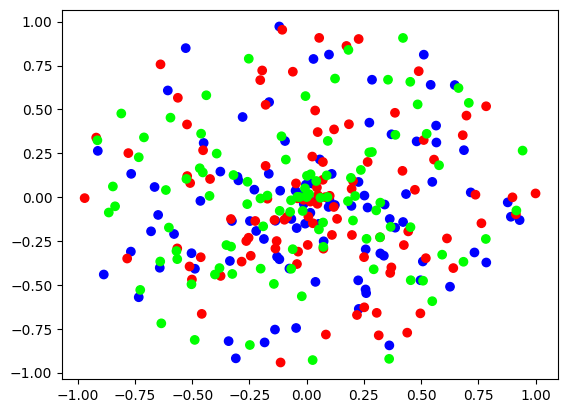

In [39]:
X, y = create_data(100, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

We have X and y as the data

In [40]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [41]:
#Layer_Dense(number of inputs or number of features per sample whether it is going to fail or not, number of neurons)
#so in the spiral dataset, we have 2 unique features so n_inputs is 2
dense1 = Layer_Dense(2, 3)

#for ReLU Activation function, it takes inputs from all values for the neurons
activation1 = Activation_ReLU()

Softmax activation function: Now we apply the softmax activation function

In [42]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        """we subtract max(inputs) from inputs becayse we may counter overflow error, 
        and by subtracting maximum from the whole array it will cause rest elements to be negative 
        which will be countered during exponentiation and will range in exp_values being from (0,1)"""
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        

In [43]:
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [44]:
#we have the layer 1 defined, and now we will input it into the neural network
dense1.forward(X)

#now we will apply the activation function to layer 1 and the cost is reduced
activation1.forward(dense1.output)

In [45]:
dense2.forward(activation1.output)
activation2.forward(dense2.output)

In [48]:
print(activation2.output)

[[0.33333333 0.33333333 0.33333333]
 [0.33331617 0.33331887 0.33336496]
 [0.33329002 0.33328922 0.33342077]
 [0.33327864 0.33327763 0.33344373]
 [0.33321373 0.33323728 0.33354899]
 [0.33323509 0.33324351 0.3335214 ]
 [0.33324696 0.33324536 0.33350769]
 [0.33327546 0.33327901 0.33344553]
 [0.3332068  0.33321457 0.33357863]
 [0.33319487 0.3332451  0.33356003]
 [0.33311619 0.33312952 0.3337543 ]
 [0.33314409 0.33317369 0.33368222]
 [0.33305033 0.33304509 0.33390457]
 [0.3330806  0.33310383 0.33381558]
 [0.33286522 0.33294423 0.33419056]
 [0.33299492 0.33308331 0.33392177]
 [0.33317719 0.33326015 0.33356266]
 [0.33295461 0.33297785 0.33406754]
 [0.3328274  0.3329341  0.3342385 ]
 [0.332629   0.33272104 0.33464996]
 [0.33292457 0.33294964 0.33412579]
 [0.33305179 0.33304658 0.33390162]
 [0.33299883 0.33301935 0.33398182]
 [0.33271936 0.33271806 0.33456258]
 [0.3327249  0.33276219 0.3345129 ]
 [0.33273745 0.33277397 0.33448859]
 [0.33303107 0.33316957 0.33379936]
 [0.33276939 0.33280396 0.33

Now we need to actually train this model